K-means cluster to breast cancer

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import cluster

In [ ]:
# read file
data=pd.read_csv('breast_cancer_data.csv')
print('the values',data.columns.values)
data.head()

the values ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
import seaborn as sns
sns.pairplot(data)

In [ ]:
# describe to data
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
# find columns int and float
colum = data.select_dtypes(include = ["int64","float64"]).keys()
print(colum) 

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

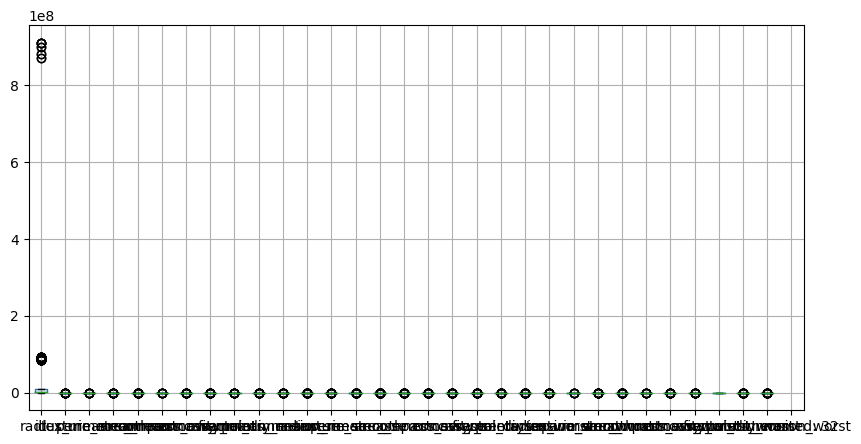

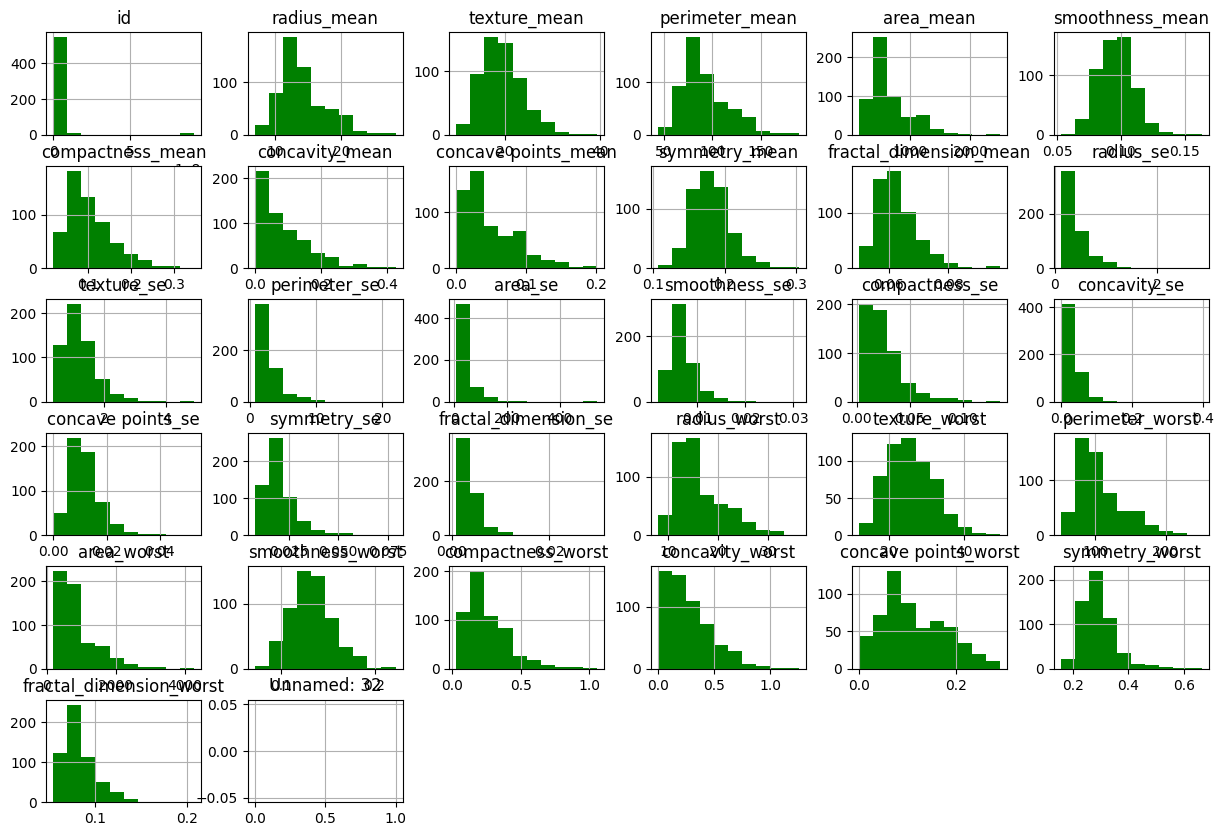

In [ ]:
# Draw the columns
rcParams['figure.figsize'] = 10,5
data[colum].boxplot()
rcParams['figure.figsize'] = 15,10
data[colum].hist(color='g')

In [ ]:
# normalized
rank_df=data.rank(method='first')
#normalized is subraction from average main on std
normalized_df=(rank_df-rank_df.mean())/rank_df.std()
normalized_df.head(10)# heading to first 10 rows 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,-1.478098,0.444038,1.161797,-1.721407,1.259121,1.173963,1.538925,1.697076,1.636249,1.630166,...,-1.459850,1.624083,1.563256,1.386858,1.654497,1.618001,1.678828,1.642332,1.545008,NaN
1,-1.472016,0.450120,1.551091,-0.377128,1.478098,1.575422,-0.973233,-0.383211,0.352797,0.827248,...,-0.371045,1.392940,1.532843,-0.474451,-0.322384,0.085158,1.161797,-0.188564,0.693429,NaN
2,1.240873,0.456203,1.423354,0.675181,1.411189,1.405106,1.167880,1.240873,1.350361,1.569339,...,0.060827,1.332113,1.405106,0.796835,1.326031,1.107053,1.581504,1.392940,0.602188,NaN
3,1.246955,0.462286,-1.015812,0.480534,-0.681263,-1.125301,1.715324,1.709241,1.538925,1.423354,...,0.316301,0.060827,-0.498782,1.715324,1.703159,1.563256,1.654497,1.727489,1.721407,NaN
4,1.253038,0.468369,1.502429,-1.344279,1.545008,1.532843,0.437955,0.948903,1.368610,1.411189,...,-1.551091,1.307783,1.265204,0.322384,-0.085158,0.961068,0.869827,-1.186128,-0.358880,NaN
5,-1.465933,0.474451,-0.468369,-1.009730,-0.291970,-0.456203,1.666662,1.356444,1.119219,0.991482,...,-0.322384,0.273722,0.231143,1.630166,1.508512,1.326031,0.997564,1.526760,1.605835,NaN
6,-1.459850,0.480534,1.210459,0.352797,1.192211,1.210459,-0.091241,0.358880,0.705594,0.863745,...,0.504865,1.344279,1.301700,0.790752,0.425790,0.821166,1.204376,0.614354,0.377128,NaN
7,1.259121,0.486617,0.182481,0.608271,0.291970,0.170316,1.557174,1.283452,0.437955,0.614354,...,0.632602,0.529196,0.638684,1.472016,1.040143,0.261557,0.772504,0.894158,1.496346,NaN
8,-1.453768,0.492699,-0.170316,0.875910,0.097323,-0.164233,1.660580,1.484181,1.295617,1.265204,...,0.991482,0.383211,0.212895,1.538925,1.526760,1.344279,1.350361,1.630166,1.417271,NaN
9,1.265204,0.498782,-0.456203,1.277369,-0.182481,-0.480534,1.545008,1.654497,1.502429,1.070557,...,1.678828,-0.006083,0.139902,1.660580,1.727489,1.715324,1.478098,1.624083,1.727489,NaN


In [ ]:
#select number the cluster and default is 8  
for n_cluster in [4,5,6,7,8]:
    kmeans=KMeans(n_clusters=n_cluster).fit(
        normalized_df[['fractal_dimension_mean','concavity_mean','texture_se']])# select the features its effect in living   
    
    silhouette_avg=silhouette_score(
        normalized_df[['fractal_dimension_mean','concavity_mean','texture_se']],
        kmeans.labels_) # edit distances between cluster
    print('Silhouette score for %i Clusters :%0.4f'%(n_cluster,silhouette_avg))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 Clusters :0.2977
Silhouette score for 5 Clusters :0.2948


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 Clusters :0.2882
Silhouette score for 7 Clusters :0.2875
Silhouette score for 8 Clusters :0.2877


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

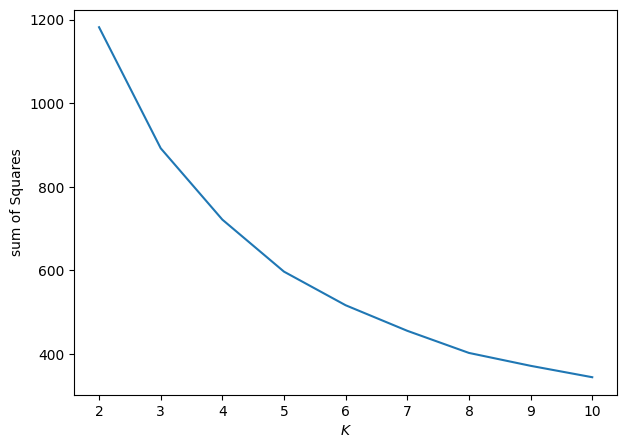

In [ ]:
#predict and plot  
sse=[]
krange = list(range(2,11)) #work list starting from 1 and end by 10 and continu by 2
X= normalized_df[['fractal_dimension_mean','concavity_mean','texture_se']].values
for n in krange:
    model=cluster.KMeans(n_clusters=n,random_state=3)
    model.fit_predict(X) # work prediction to model
    cluster_assignments=model.labels_
    centers=model.cluster_centers_
    sse.append(np.sum((X-centers[cluster_assignments])**2))

rcParams['figure.figsize'] = 7,5
plt.plot(krange,sse)
plt.xlabel('$K$')
plt.ylabel('sum of Squares')


plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4).fit(normalized_df[['fractal_dimension_mean','concavity_mean','texture_se']]) # select kmeans to normalize or features
four_cluster_df=normalized_df[['fractal_dimension_mean','concavity_mean','texture_se']].copy(deep=True)
four_cluster_df['Cluster']=kmeans.labels_ #add new column and in it number cluster
four_cluster_df.head(10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,fractal_dimension_mean,concavity_mean,texture_se,Cluster
0,1.636249,1.636249,-0.675181,2
1,-1.113136,0.352797,-1.173963,0
2,-0.401459,1.350361,-1.009730,0
3,1.727489,1.538925,0.109489,2
4,-0.705594,1.368610,-1.027978,0
5,1.557174,1.119219,-0.736008,2
6,-0.930655,0.705594,-1.058391,0
7,1.526760,0.437955,0.669098,2
8,1.490264,1.295617,-0.358880,2
9,1.678828,1.502429,1.088805,2


In [ ]:
# select number clusters
cluster0_metrics=kmeans.cluster_centers_[0]
cluster1_metrics=kmeans.cluster_centers_[1]
cluster2_metrics=kmeans.cluster_centers_[2]
cluster3_metrics=kmeans.cluster_centers_[3]

data=[cluster0_metrics,cluster1_metrics,cluster2_metrics,cluster3_metrics]
cluster_center_df=pd.DataFrame(data) # edit cluster center to data freem  
cluster_center_df.colums=four_cluster_df.columns[0:4]
four_cluster_df

<ipython-input-16-764afa03202a>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cluster_center_df.colums=four_cluster_df.columns[0:4]


,fractal_dimension_mean,concavity_mean,texture_se,Cluster
0,1.636249,1.636249,-0.675181,2
1,-1.113136,0.352797,-1.173963,0
2,-0.401459,1.350361,-1.009730,0
3,1.727489,1.538925,0.109489,2
4,-0.705594,1.368610,-1.027978,0
...,...,...,...,...
564,-1.222625,1.557174,0.377128,0
565,-1.386858,0.967151,1.618001,0
566,-1.173963,0.401459,-0.060827,0
567,1.271286,1.690993,1.076640,2


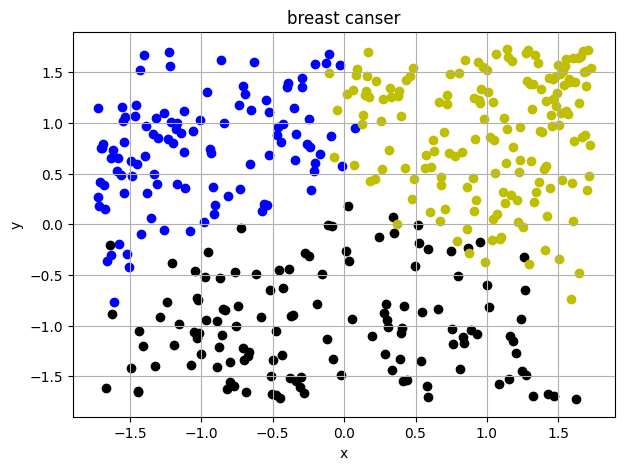

In [ ]:
# drawing scatter to column fractal_dimension_mean with concavity_mean
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['fractal_dimension_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['concavity_mean'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['fractal_dimension_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['concavity_mean'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['fractal_dimension_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['concavity_mean'],
c='y')
plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()


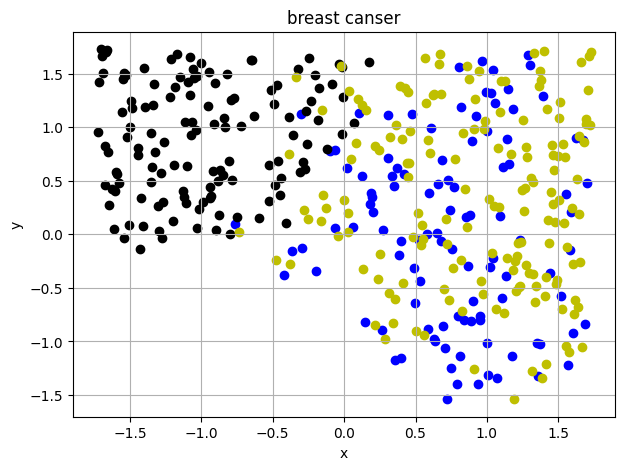

In [ ]:
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['concavity_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['texture_se'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['concavity_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['texture_se'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['concavity_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['texture_se'],
c='y')
plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

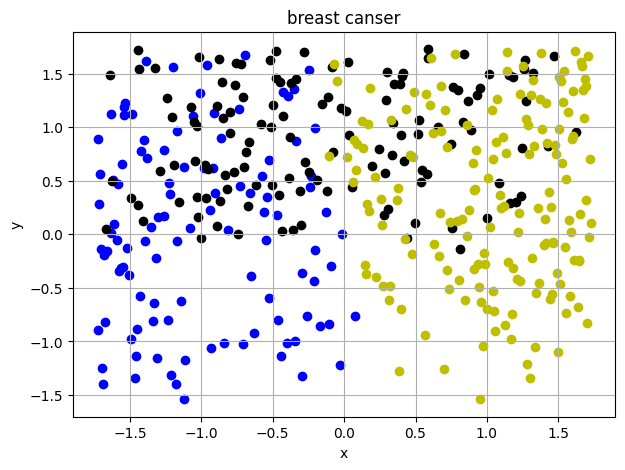

In [ ]:
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['fractal_dimension_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['texture_se'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['fractal_dimension_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['texture_se'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['fractal_dimension_mean'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['texture_se'],
c='y')
plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()